<a href="https://colab.research.google.com/github/josafamarengo/classification-metrics/blob/main/Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metrics of Classification 
<a href="https://github.com/josafamarengo/" target="_blank"><img src="https://img.icons8.com/fluency/96/null/github.png" width="30"/></a> Josafá Marengo

Lets start with importing libraries we will need in this notebook.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

np.random.seed(42)  # for reproducibility
sns.set(rc={"figure.figsize": (8, 8)})
sns.set_style("ticks")

### Dataset
For comparing different metrics, we will use the [Breast Cancer Dataset](https://goo.gl/U2Uwz2) which is provided by sckit-learn in `dataset` module. This dataset is used for binary classification between two types of cancer.

In [2]:
data = load_breast_cancer()
print(data.DESCR[:760])  # print short description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline appr


Let's see what are the targets classes i.e. types of cancer.

In [3]:
print(f"Types of cancer (targets) are {data.target_names}")

Types of cancer (targets) are ['malignant' 'benign']


What is the dimension of data?  We see there are **569 examples** and each example has **30 features**.  
The **target** variable is binary (**0 and 1** for `malignant` and `benign`).   
We will consider `benign` as `positive` class, and `malignant` as `negative` class.  
We can understand it as:  
`0 for is_not_benign`  
`1 for is_benign`

In [4]:
X = data.data  # features
y = data.target  # labels
print(f"Shape of features is {X.shape}, and shape of target is {y.shape}")

Shape of features is (569, 30), and shape of target is (569,)


### Split the data
Since we shouldn't train and test our model with the same dataset, it is always a good idea to split the data in three parts - train data, test data, and validation data.  
We won't require validation data here.
We split the dataset into training and testing data, with 369 examples for training, and 200 examples for testing.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, random_state=42, stratify=y)

In [6]:
y_train[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

### Training and predicting data

In this example, we will use scikit's Support Vector Machines classifier to predict whether its a benign cancer.  
`SVC` classifier is used from `sklearn.svm`. Ofcourse, we can try any of the other classifiers and compare accuracies.

In [7]:
classifier = svm.SVC(kernel='linear', probability=True, verbose=True)

Next we fit/train the model on our _training dataset_. It trains quite fast since we are working with relatively small dataset.

In [8]:
classifier.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', probability=True, verbose=True)

Now save the prediction results both as probability and as classes.  
**`y_preds`** is a **1D vector** of one of `{0, 1}` values, denoting predictions as malignant and benign, respectively.  
**`y_proba`** is a **2D vector**, where for each example, it contains a vector of length 2,  
`[prob. of malignant, prob. of benign]`

In [9]:
y_preds = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)

We need to reshape `y_proba` to a 1D vector denoting the probability of having  `benign` cancer.

In [10]:
y_proba = y_proba[:,1].reshape((y_proba.shape[0],))

In [11]:
y_proba[:5], y_preds[:5], y_test[:5]

(array([0.99697262, 0.08136644, 0.99999168, 0.96809392, 0.99999907]),
 array([1, 0, 1, 1, 1]),
 array([1, 0, 1, 1, 1]))

### Confusion Matrix

Let us calculate confusion matrix of the predictions. It is implemented in Scikit-learn's [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [12]:
conf = metrics.confusion_matrix(y_test, y_preds)
conf

array([[ 68,   7],
       [  2, 123]])

We can also implement our own confusion matrix.  Here's my implementation.

In [13]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [14]:
conf = get_confusion_matrix(y_test, y_preds)
conf

array([[ 68,   7],
       [  2, 123]])

Text(0.5, 87.37999999999997, 'Predicted label')

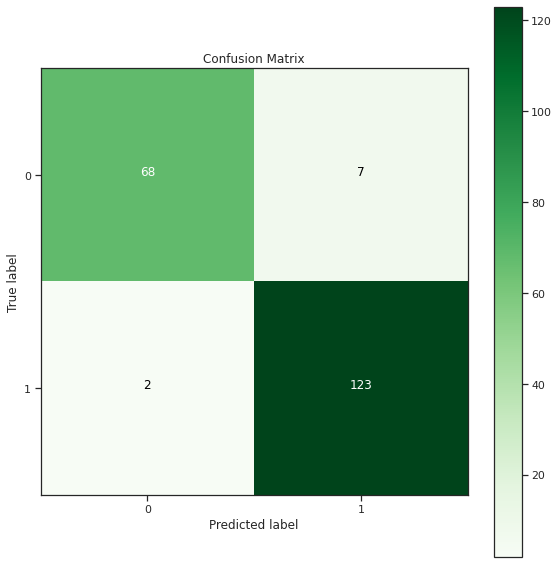

In [15]:
classes = [0, 1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

From the confusion matrix, we can see the number of examples predicted correct by our classifier, for both classes seperately.  
We can get the numbers of `True Positives, True Negatives, False Positives, and False Negatives` from this confusion matrix.   
Lets store these terms in some variables.

In [16]:
# from the confusion matrix
TP = true_pos = 123
TN = true_neg = 68
FP = false_pos = 7
FN = false_neg = 2

### Some basic metrics

Now, we will calculate some basic metrics from these four values.  
We will need a dictionary to store these metrics. Lets create a dictionary `results`.

In [19]:
results = {}

#### Accuracy 
number of examples correctly predicted / total number of examples  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c72ec21ef2505c2d376e96197637fc64f75e5891)

In [20]:
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")

ACC is  0.955


#### Sensitivity
number of samples actually and predicted as  `Positive` / total number of samples actually `Positive`  
Also called **Sensitivity or Recall**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/64d5540cbadeb83f864d7a731b7ab43cccd0f353)


In [21]:
# Sensitivity or Recall
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

TPR is  0.984



#### Specificity
number of samples actually and predicted as  `Negative` / total number of samples actually  `Negative`  
Also called **Specificity**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/aac65b6586cb61c1268403895012c2a8f19b0c5e)


In [22]:
# Specificity
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

TNR is  0.907


#### Precision
number of samples actually and predicted as  `Positive` / total number of samples predicted as `Positive`  
Also called **Precision**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/699fcdb880b7f6a92742bc0845b8b60b59806a98)


In [23]:
# Precision
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")

PPV is  0.946


#### F-score
Harmonic Mean of Precision and Recall.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5663ca95d471868169c4e4ea57c936f1b6f4a588)

In [ ]:
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")

F1 is  0.965
